In [1]:
!pip install evalml
!pip install pandas-profiling

# import the necessary libraries and load the dataset

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import evalml
from evalml import AutoMLSearch
import logging
import os


Load dataset(test,train)

In [7]:
#Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [10]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


preprocess the data by filling missing values, encoding categorical variables, and scaling the numerical features

In [9]:

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# Fill missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna('Unknown', inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'])

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scaler.fit_transform(df[['Item_Weight', 'Item_Visibility', 'Item_MRP']])


In [14]:
#join train and test dataset
#create source column having train and test values to perform train test split later
train_data["source"]="train"
test_data["source"]="test"

data=pd.concat([train_data,test_data],ignore_index=True)

In [15]:
print("Train dataset shape-",train_data.shape)
print("Test dataset shape-",test_data.shape)
print("Combine dataset shape-",data.shape)

Train dataset shape- (8523, 13)
Test dataset shape- (5681, 12)
Combine dataset shape- (14204, 13)


In [16]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [17]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [18]:
#Number of Null values in Dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [19]:
#Percentage of null values in dataset
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

Model building preparation

Split the Dataset and Perform Scaling on the X_train and X_test

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset into a pandas DataFrame
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Combine the train and test datasets
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Fill missing values
combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean(), inplace=True)
combined_df['Outlet_Size'].fillna('Unknown', inplace=True)

# Encode categorical variables
combined_df = pd.get_dummies(combined_df, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'])

# Encode Item_Type using one-hot encoding
encoder = OneHotEncoder(sparse=False)
item_type_encoded = encoder.fit_transform(combined_df[['Item_Type']])
item_type_df = pd.DataFrame(item_type_encoded, columns=encoder.get_feature_names_out(['Item_Type']))
combined_df = pd.concat([combined_df, item_type_df], axis=1)
combined_df.drop('Item_Type', axis=1, inplace=True)

# Split the combined dataset into training and testing sets
train_rows = train_df.shape[0]
train_df = combined_df[:train_rows].reset_index(drop=True)
test_df = combined_df[train_rows:].reset_index(drop=True)

# Split the training dataset into features and target variable
X_train = train_df.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1)
y_train = train_df['Item_Outlet_Sales']

# Scale numerical features
scaler = StandardScaler()
X_train[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scaler.fit_transform(X_train[['Item_Weight', 'Item_Visibility', 'Item_MRP']])

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Split the testing dataset into features and target variable
X_test = test_df.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1)

# Scale numerical features
X_test[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scaler.transform(X_test[['Item_Weight', 'Item_Visibility', 'Item_MRP']])

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Fill the missing Item_Outlet_Sales values in the test dataset with the predicted values
test_df['Item_Outlet_Sales'] = y_pred
test_df[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']].to_csv('submission.csv', index=False)



In [46]:
# Make predictions on new data
new_data = train_df.sample(10) # Sample 10 random rows from the training data
columns_to_encode = [col for col in ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'] if col in new_data.columns]
new_data[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scaler.transform(new_data[['Item_Weight', 'Item_Visibility', 'Item_MRP']])
new_data = pd.get_dummies(new_data, columns=columns_to_encode)
predictions = model.predict(new_data.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1))

print('Predictions:', predictions)


Predictions: [2065.52833864 3979.23974756 1090.10299656 3090.5100452   577.04733984
  789.39648504 2881.5680275  2823.07736647 2881.27696232 1028.13833271]


Some Graphical representations

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

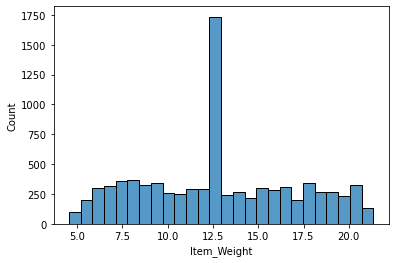

In [47]:
# Plot a histogram of Item_Weight
sns.histplot(df['Item_Weight'], kde=False)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

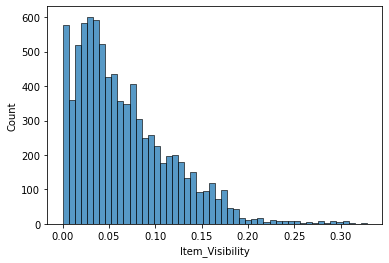

In [48]:
# Plot a histogram of Item_Visibility
sns.histplot(df['Item_Visibility'], kde=False)

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

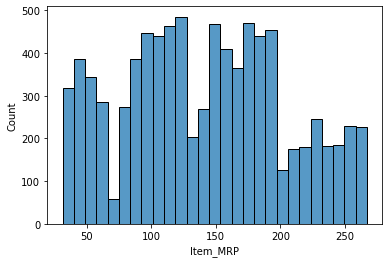

In [49]:
# Plot a histogram of Item_MRP
sns.histplot(df['Item_MRP'], kde=False)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

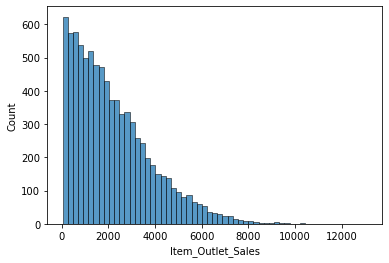

In [89]:
# Plot a histogram of Item_Outlet_Sales
sns.histplot(df['Item_Outlet_Sales'], kde=False)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Count'>

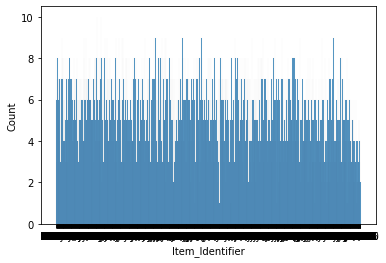

In [90]:
# Plot a histogram of Item_Identifier
sns.histplot(df['Item_Identifier'], kde=False)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Count'>

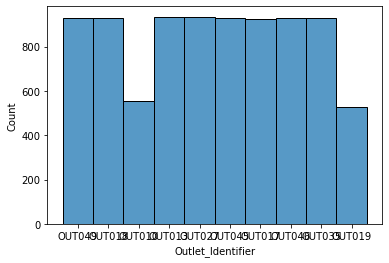

In [91]:
# Plot a histogram of Outlet_Identifier
sns.histplot(df['Outlet_Identifier'], kde=False)

Metrics for drawing comparisons

In [57]:
from sklearn.model_selection import cross_val_score
# Train a linear regression model using cross-validation
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Print the RMSE scores
print('RMSE scores:', rmse_scores)
print('Average RMSE:', rmse_scores.mean())
print('Standard deviation:', rmse_scores.std())


RMSE scores: [1152.95104281 1122.84855182 1114.73019817 1129.93339861 1143.09145154]
Average RMSE: 1132.7109285907468
Standard deviation: 13.752856393122675


In [72]:
# Load the dataset into a pandas DataFrame
print('Predictions:', predictions)

# Calculate R-squared score on training data
y_pred_train = model.predict(X_train)
r2score_train = r2_score(y_train, y_pred_train)
print('R-squared score on training data:', r2score_train)

# Calculate R-squared score on testing data
X_test = pd.read_csv('test.csv')
X_test['Item_Weight'].fillna(X_test['Item_Weight'].mean(), inplace=True)
X_test['Outlet_Size'].fillna('Unknown', inplace=True)
X_test = pd.get_dummies(X_test, columns=['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'])
X_test = pd.concat([X_test, pd.DataFrame(columns=encoder.get_feature_names_out(['Item_Type']))]) # add columns for all possible Item_Type values
X_test[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scaler.transform(X_test[['Item_Weight', 'Item_Visibility', 'Item_MRP']]) # scale numerical features
X_test = X_test.fillna(0) # fill any missing values with zeros
X_test[item_type_df.columns] = encoder.transform(X_test[['Item_Type']]) # use the same encoder to transform the Item_Type column

Predictions: [2065.52833864 3979.23974756 1090.10299656 3090.5100452   577.04733984
  789.39648504 2881.5680275  2823.07736647 2881.27696232 1028.13833271]
R-squared score on training data: 0.5638369082389556


Model Selection

LR: 0.560661 (0.016248)
RF: 0.556094 (0.020910)


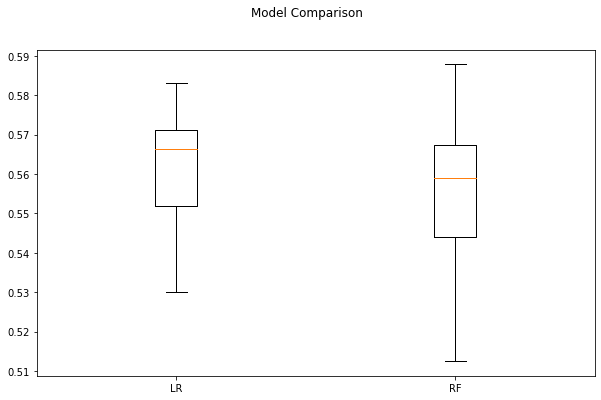

In [86]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define a list of models to evaluate
models = [
    ('LR', LinearRegression()),
    ('RF', RandomForestRegressor())
]

# Evaluate each model using k-fold cross-validation
results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare model performance using boxplots
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
